PREDICT STOCK PRICE WITH PROPHET MODEL

In [1]:

import prophet     # installed with conda install -c conda-forge prophet in cmd (my env: base)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# import data
data = pd.read_csv("GOOG.csv")     # download latest one year(253 entries) stock prices from https://finance.yahoo.com/quote/GOOG/history/
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-07,2606.820068,2612.798096,2595.199951,2601.550049,2601.550049,834000
1,2021-07-08,2565.000000,2600.649902,2560.800049,2583.540039,2583.540039,989000
2,2021-07-09,2578.889893,2596.989990,2578.870117,2591.489990,2591.489990,755300
3,2021-07-12,2596.669922,2615.399902,2592.000000,2611.280029,2611.280029,847200
4,2021-07-13,2617.629883,2640.840088,2612.739990,2619.889893,2619.889893,830900


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


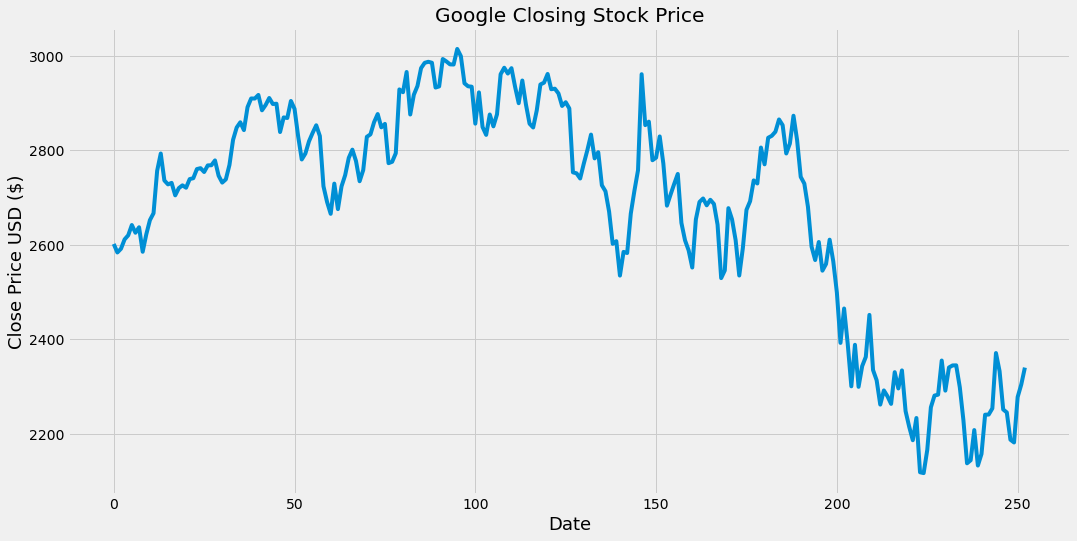

In [9]:
# visualize the data

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [15]:
# only two features are needed

data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})   #  have to rename columns into ds and y for the model
data.head()

,ds,y
0,2021-07-07,2601.550049
1,2021-07-08,2583.540039
2,2021-07-09,2591.489990
3,2021-07-12,2611.280029
4,2021-07-13,2619.889893


In [16]:
# fit the data to the Facebook Prophet model for stock price prediction

from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


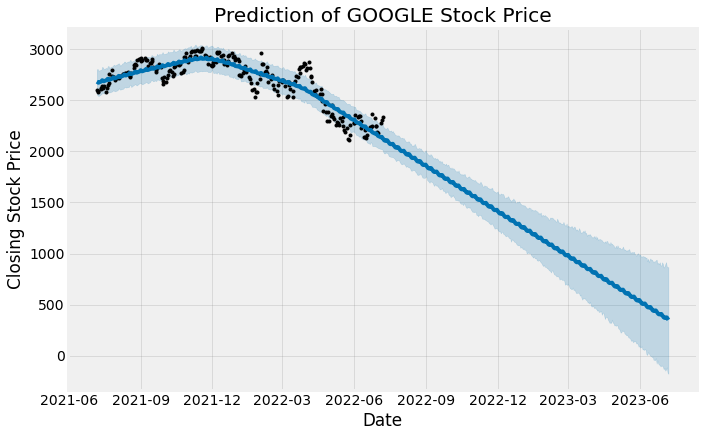

In [17]:
# stock price prediction made by the model

future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

#   Black dots : Original Data
#   The Blue line : the forecast model
#   The Light Blue area : the confidence interval

In [36]:
#print(predictions.head())
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
613,2023-07-03,313.982109,-147.040406,895.139277,-179.374596,800.241364,59.439941,59.439941,59.439941,58.995861,58.995861,58.995861,0.444080,0.444080,0.444080,0.0,0.0,0.0,373.422049
614,2023-07-04,309.123308,-135.338745,916.402516,-187.209298,797.682075,60.521946,60.521946,60.521946,58.995861,58.995861,58.995861,1.526085,1.526085,1.526085,0.0,0.0,0.0,369.645254
615,2023-07-05,304.264506,-114.138066,870.495945,-193.100000,795.122786,70.325904,70.325904,70.325904,58.995861,58.995861,58.995861,11.330043,11.330043,11.330043,0.0,0.0,0.0,374.590410
616,2023-07-06,299.405705,-167.447342,866.384929,-198.842043,791.490421,63.785738,63.785738,63.785738,58.995861,58.995861,58.995861,4.789877,4.789877,4.789877,0.0,0.0,0.0,363.191444
617,2023-07-07,294.546904,-178.079613,867.415529,-204.584085,789.532387,55.654741,55.654741,55.654741,58.995861,58.995861,58.995861,-3.341120,-3.341120,-3.341120,0.0,0.0,0.0,350.201645


In [43]:
# prediction on date 2023-07-04
predictions.loc[predictions['ds']=='2023-07-04']

#  ili 
predictions.query("ds == 20230704")

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
614,2023-07-04,309.123308,-135.338745,916.402516,-187.209298,797.682075,60.521946,60.521946,60.521946,58.995861,58.995861,58.995861,1.526085,1.526085,1.526085,0.0,0.0,0.0,369.645254


In [41]:
# same date and only column of interest
predictions.loc[predictions['ds']=='2023-07-04',['yhat']]

,yhat
614,369.645254


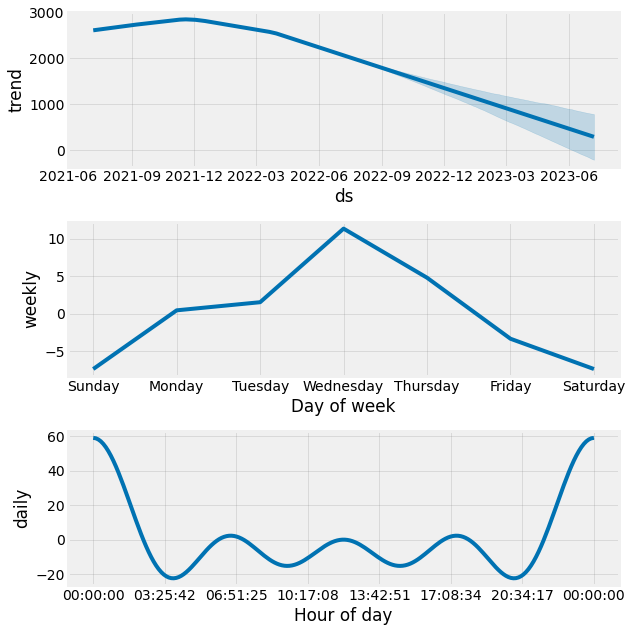

In [18]:
# seasonal affects on this prediction

m.plot_components(predictions)
plt.show()

PREDICT TEMPERATURE AND PRESSURE WITH LSTM AND CNN

In [10]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#   load data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',     #  climate measures for every 10 minutes interval
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path) # we dont need .zip so we split

In [3]:
df = pd.read_csv(csv_path)
df = df[5::6]   # dont need whole dataset, only every 6th value (every hour measure)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [4]:
df.info()   # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        70091 non-null  object 
 1   p (mbar)         70091 non-null  float64
 2   T (degC)         70091 non-null  float64
 3   Tpot (K)         70091 non-null  float64
 4   Tdew (degC)      70091 non-null  float64
 5   rh (%)           70091 non-null  float64
 6   VPmax (mbar)     70091 non-null  float64
 7   VPact (mbar)     70091 non-null  float64
 8   VPdef (mbar)     70091 non-null  float64
 9   sh (g/kg)        70091 non-null  float64
 10  H2OC (mmol/mol)  70091 non-null  float64
 11  rho (g/m**3)     70091 non-null  float64
 12  wv (m/s)         70091 non-null  float64
 13  max. wv (m/s)    70091 non-null  float64
 14  wd (deg)         70091 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.0+ MB


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')   # set index as datetime
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


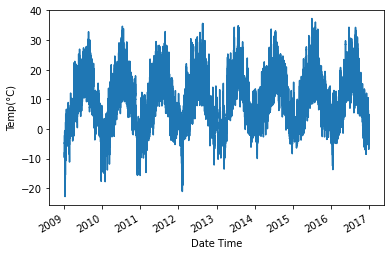

In [15]:
# visualize temperature through time
temp = df['T (degC)']
temp.plot()
plt.ylabel('Temp(°C)')
plt.show()

In [12]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [16]:
# [[[1], [2], [3], [4], [5]]] [6]   - we take temp for first five hours and we want to forecast 6th hour, so 1st bracket is X and second is y
# [[[2], [3], [4], [5], [6]]] [7]    - then we move one value next

# helper function
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [17]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [18]:
# split data to train, val, test
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [89]:
# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError as MSE
from tensorflow.keras.metrics import RootMeanSquaredError as RMSE
from tensorflow.keras.optimizers import Adam


model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [90]:
# define callback and compile model
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MSE(), optimizer=Adam(learning_rate=0.0001), metrics=[RMSE()])

In [91]:
# train model
import time
start = time.time()
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])
end = time.time()
timesum=(end - start)/60
print(round(timesum,2), "minutes")

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 49.4048 - root_mean_squared_error: 7.0289

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 19s 9ms/step - loss: 49.2130 - root_mean_squared_error: 7.0152 - val_loss: 1.4758 - val_root_mean_squared_error: 1.2148
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.4744 - root_mean_squared_error: 1.5730

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 2.4735 - root_mean_squared_error: 1.5727 - val_loss: 0.6608 - val_root_mean_squared_error: 0.8129
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 1.0061 - root_mean_squared_error: 1.0031

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 1.0061 - root_mean_squared_error: 1.0031 - val_loss: 0.5541 - val_root_mean_squared_error: 0.7444
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7563 - root_mean_squared_error: 0.8696

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.7554 - root_mean_squared_error: 0.8691 - val_loss: 0.5210 - val_root_mean_squared_error: 0.7218
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6899 - root_mean_squared_error: 0.8306

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.6898 - root_mean_squared_error: 0.8305 - val_loss: 0.5060 - val_root_mean_squared_error: 0.7114
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6683 - root_mean_squared_error: 0.8175 - val_loss: 0.5222 - val_root_mean_squared_error: 0.7226
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6581 - root_mean_squared_error: 0.8112

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.6582 - root_mean_squared_error: 0.8113 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7028
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6529 - root_mean_squared_error: 0.8080

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6531 - root_mean_squared_error: 0.8081 - val_loss: 0.4896 - val_root_mean_squared_error: 0.6997
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6489 - root_mean_squared_error: 0.8055 - val_loss: 0.5084 - val_root_mean_squared_error: 0.7130
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.5005 - val_root_mean_squared_error: 0.7075
2.66 minutes


In [22]:
# load model and predict
from tensorflow.keras.models import load_model

model1 = load_model('model1/')

In [92]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
print(val_results)


from math import sqrt

# calculate the RMSE
temp_pred_err=sqrt(MSE(y_val1,val_predictions))
print('RMSE: ',temp_pred_err)                      #  temp average error is 0.7 °C 

157/157 [==============================] - 1s 4ms/step
      Val Predictions  Actuals
0           15.362498    14.02
1           13.247159    13.67
2           13.205696    12.27
3           11.615582    11.19
4           10.512325    10.85
...               ...      ...
4995        17.547920    18.27
4996        17.635881    17.85
4997        17.475578    16.65
4998        15.987864    15.85
4999        15.232045    15.09

[5000 rows x 2 columns]
RMSE:  0.7074920223962152


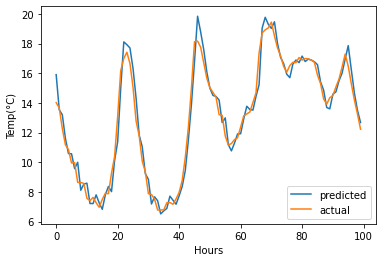

In [52]:
# visualize ground truth and predicted val data
plt.plot(val_results['Val Predictions'][:100],label='predicted')
plt.plot(val_results['Actuals'][:100],label='actual')
plt.xlabel('Hours')
plt.ylabel('Temp(°C)')
plt.legend(loc = "lower right")

In [26]:
# predict, visualize on test data
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,14.530169,13.99
1,13.377739,13.46
2,12.975251,12.93
3,12.561236,12.43
4,12.105077,12.17
...,...,...
5081,-0.830023,-0.98
5082,-1.471367,-1.40
5083,-1.763161,-2.75
5084,-3.120458,-2.89


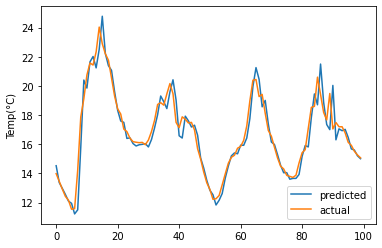

In [27]:
plt.plot(test_results['Test Predictions'][:100],label='predicted')
plt.plot(test_results['Actuals'][:100],label='actual')
plt.ylabel('Temp(°C)')
plt.legend(loc = "lower right")

In [36]:
# predict on some new data
new=[[1.22,2.33,6,8,13.44],[1,2.5,3.3,4,5.5]]
new=np.array(new)
new=np.expand_dims(new, axis=2)
print(new.shape)
pred=model1.predict(new)
pred

(2, 5, 1)
1/1 [==============================] - 0s 18ms/step


array([[16.446571 ],
       [ 6.3191304]], dtype=float32)

In [37]:
new2=[[12,14,15,13,11]]
new2=np.array(new2)
new2=np.expand_dims(new2, axis=2)
print(new2.shape)
pred2=model1.predict(new2)
pred2

(1, 5, 1)
1/1 [==============================] - 0s 72ms/step


array([[9.970946]], dtype=float32)

In [66]:

# helper function
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])

  return df, sqrt(MSE(y, predictions))

In [54]:
#  define model 2, CNN
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()     #   less parameters than LSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [55]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MSE(), optimizer=Adam(learning_rate=0.0001), metrics=[RMSE()])

In [56]:

start = time.time()
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])
end = time.time()
timesum=(end - start)/60
print(round(timesum,2), "minutes")

Epoch 1/10
1852/1875 [============================>.] - ETA: 0s - loss: 8.3652 - root_mean_squared_error: 2.8923

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 2ms/step - loss: 8.2842 - root_mean_squared_error: 2.8782 - val_loss: 1.1105 - val_root_mean_squared_error: 1.0538
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 1.1924 - root_mean_squared_error: 1.0920

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 3ms/step - loss: 1.1924 - root_mean_squared_error: 1.0920 - val_loss: 0.7292 - val_root_mean_squared_error: 0.8540
Epoch 3/10
1850/1875 [============================>.] - ETA: 0s - loss: 0.8556 - root_mean_squared_error: 0.9250

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.8546 - root_mean_squared_error: 0.9244 - val_loss: 0.5817 - val_root_mean_squared_error: 0.7627
Epoch 4/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.7265 - root_mean_squared_error: 0.8524

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.7275 - root_mean_squared_error: 0.8529 - val_loss: 0.5197 - val_root_mean_squared_error: 0.7209
Epoch 5/10
1852/1875 [============================>.] - ETA: 0s - loss: 0.6940 - root_mean_squared_error: 0.8330

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6936 - root_mean_squared_error: 0.8328 - val_loss: 0.5084 - val_root_mean_squared_error: 0.7130
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6830 - root_mean_squared_error: 0.8265 - val_loss: 0.5144 - val_root_mean_squared_error: 0.7172
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6795 - root_mean_squared_error: 0.8243 - val_loss: 0.5096 - val_root_mean_squared_error: 0.7139
Epoch 8/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6765 - root_mean_squared_error: 0.8225

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6766 - root_mean_squared_error: 0.8225 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7026
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6643 - root_mean_squared_error: 0.8151 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6585 - root_mean_squared_error: 0.8115

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.6594 - root_mean_squared_error: 0.8120 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984
0.75 minutes


157/157 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       15.563410    14.02
 1       12.800006    13.67
 2       12.908916    12.27
 3       11.510190    11.19
 4       10.651362    10.85
 ...           ...      ...
 4995    16.857166    18.27
 4996    17.408472    17.85
 4997    17.242294    16.65
 4998    15.897496    15.85
 4999    14.990467    15.09
 
 [5000 rows x 2 columns],
 0.6984217981260856)

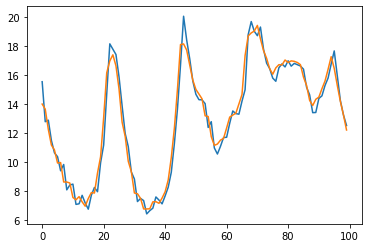

In [67]:
plot_predictions1(model2, X_val1, y_val1, start=0, end=100) 

# compared to LSTM model, CNN model has less parameters, quicker training time and similar results (rmse 0.7 and 0.69)


In [68]:
# predict two variables: temp and pressure

press_temp_df = pd.concat([df['p (mbar)'], temp], axis=1)
press_temp_df.head()

,p (mbar),T (degC)
Date Time,,
2009-01-01 01:00:00,996.50,-8.05
2009-01-01 02:00:00,996.62,-8.88
2009-01-01 03:00:00,996.84,-8.81
2009-01-01 04:00:00,996.99,-9.05
2009-01-01 05:00:00,997.46,-9.63


In [72]:
# we need to scale data for better model performance

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(press_temp_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled,columns=['p (mbar)','T (degC)'])
df_scaled.head()

,p (mbar),T (degC)
0,0.871792,-2.077622
1,0.886148,-2.176158
2,0.912468,-2.167848
3,0.930413,-2.196340
4,0.986641,-2.265196


In [73]:
# helper function

def df_to_X_y2(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]   # now we have two features
    y.append(label)
  return np.array(X), np.array(y)


In [74]:
X2, y2 = df_to_X_y2(df_scaled)
X2.shape, y2.shape

((70084, 7, 2), (70084, 2))

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    train_size=.7)

In [79]:
model3 = Sequential()
model3.add(InputLayer((7, 2)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(2, 'linear'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17152     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 17,690
Trainable params: 17,690
Non-trainable params: 0
_________________________________________________________________


In [80]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MSE(), optimizer=Adam(learning_rate=0.0001), metrics=[RMSE()])

In [81]:
start=time.time()
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[cp3])
end = time.time()
timesum=(end - start)/60
print(round(timesum,2), "minutes")

Epoch 1/10
1532/1534 [============================>.] - ETA: 0s - loss: 0.1889 - root_mean_squared_error: 0.4346

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 18s 11ms/step - loss: 0.1888 - root_mean_squared_error: 0.4345 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 2/10
1533/1534 [============================>.] - ETA: 0s - loss: 0.0249 - root_mean_squared_error: 0.1577

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 15s 10ms/step - loss: 0.0249 - root_mean_squared_error: 0.1577 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 3/10
1532/1534 [============================>.] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1114

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 15s 10ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 4/10
1532/1534 [============================>.] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.0918

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 15s 10ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 5/10
1533/1534 [============================>.] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.0836

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 15s 10ms/step - loss: 0.0070 - root_mean_squared_error: 0.0836 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 6/10
1534/1534 [==============================] - 13s 8ms/step - loss: 0.0065 - root_mean_squared_error: 0.0808 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 7/10
1529/1534 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0798

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 17s 11ms/step - loss: 0.0064 - root_mean_squared_error: 0.0798 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 8/10
1525/1534 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0790

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 14s 9ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 9/10
1527/1534 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0786

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1534/1534 [==============================] - 14s 9ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0745
Epoch 10/10
1534/1534 [==============================] - 12s 8ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
2.49 minutes


In [153]:
predictions3 = model3.predict(X_test)
inverse_pred = std_scaler.inverse_transform(predictions3)
inverse_y_test=std_scaler.inverse_transform(y_test)

# pressure predictions
results_press = pd.DataFrame(data={'Predictions':inverse_pred[:,0], 'Actuals':inverse_y_test[:,0]})
results_press.head(10)

# calculate the RMSE
press_pred_err=sqrt(MSE(y_test[:,1],predictions3[:,1]))
print('RMSE: ',press_pred_err)

658/658 [==============================] - 3s 4ms/step
RMSE:  0.09807501593711383


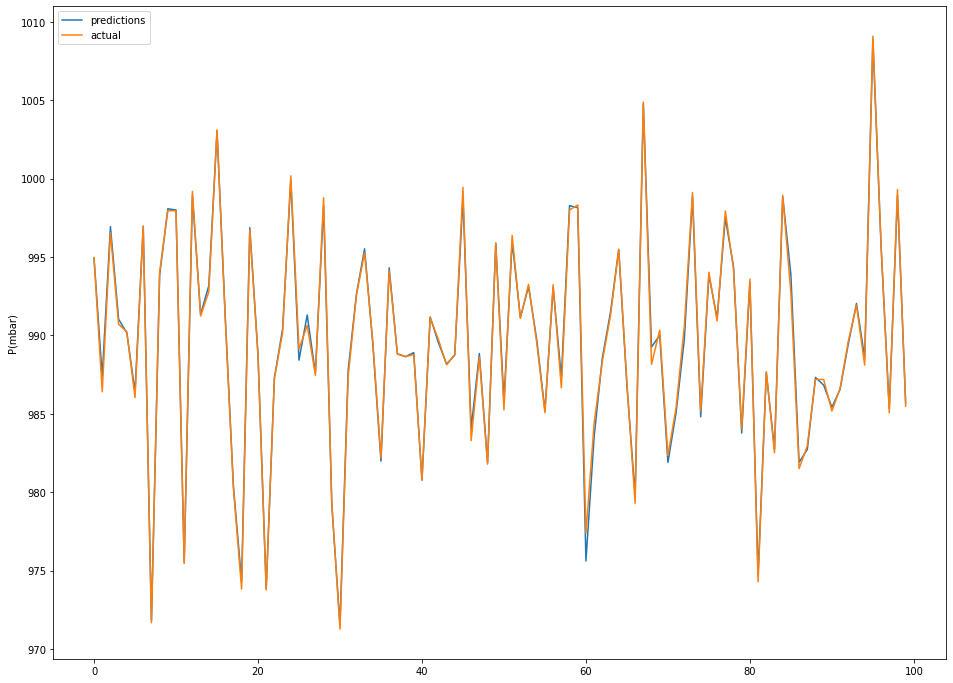

In [161]:
plt.figure(figsize=(16,12))
plt.plot(results_press['Predictions'][0:100],label='predictions')
plt.plot(results_press['Actuals'][0:100],label='actual')
plt.ylabel('P(mbar)')
plt.legend()

In [141]:
# temperture predictions
results_temp = pd.DataFrame(data={'Predictions':inverse_pred[:,1], 'Actuals':inverse_y_test[:,1]})
results_temp.head(10)

# calculate the RMSE
temp_pred_err2=sqrt(MSE(y_test[:,0],predictions3[:,0]))
print('RMSE: ',temp_pred_err2)

RMSE:  0.042529351621864546


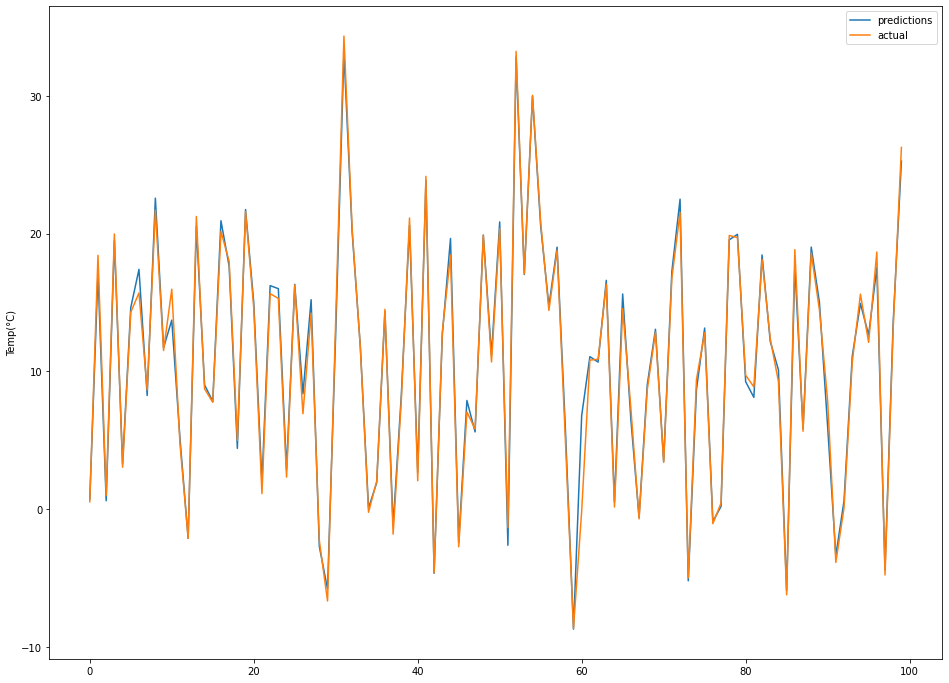

In [162]:
plt.figure(figsize=(16,12))
plt.plot(results_temp['Predictions'][0:100],label='predictions')
plt.plot(results_temp['Actuals'][0:100],label='actual')
plt.ylabel('Temp(°C)')
plt.legend()

Text(0.5, 1.0, 'Pressure(mbar)')

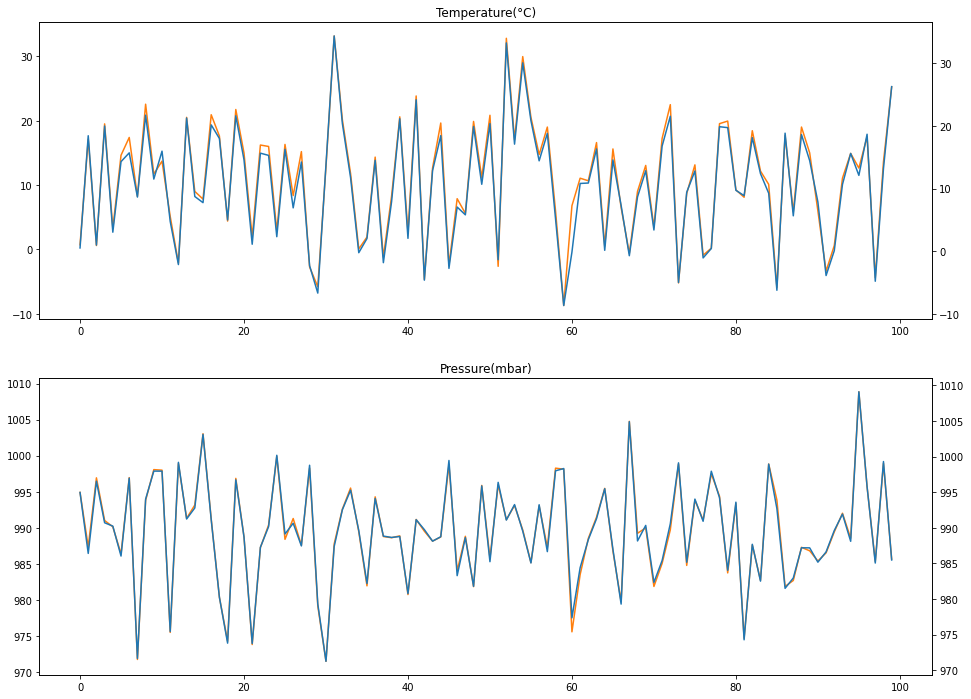

In [158]:
#  subplots on one figure

fig, ax = plt.subplots(2, 1,figsize=(16,12)) 
ax[0].plot(results_temp.index[0:100],results_temp['Predictions'][0:100],color='tab:orange') 
ax1=ax[0].twinx()
plt.title('Temperature(°C)')
ax1.plot(results_temp.index[0:100],results_temp['Actuals'][0:100],color='tab:blue')
ax[1].plot(results_press.index[0:100],results_press['Predictions'][0:100],color='tab:orange') 
ax2=ax[1].twinx()
ax2.plot(results_press.index[0:100],results_press['Actuals'][0:100],color='tab:blue')
plt.title('Pressure(mbar)')